In [5]:
import json
import pandas as pd

In [6]:
en_correct_path = "./judge/result/Qwen-Qwen3-8B/preference/en_correct_zh_cn_incorrect.jsonl"
zh_correct_path = "./judge/result/Qwen-Qwen3-8B/preference/en_incorrect_zh_cn_correct.jsonl"

In [22]:
with open(zh_correct_path) as fp:
    zhc = pd.read_json(fp, lines=True)

In [23]:
with open(en_correct_path) as fp:
    enc = pd.read_json(fp, lines=True)

In [30]:
# Convert preference rows to objects for easier access
class PreferenceRow:
    """Object wrapper for preference row data"""
    def __init__(self, row_dict):
        for key, value in row_dict.items():
            setattr(self, key, value)
    
    def __repr__(self):
        attrs = ', '.join(f"{k}={v}" for k, v in self.__dict__.items())
        return f"PreferenceRow({attrs})"

# Convert DataFrame rows to PreferenceRow objects
enc_objects = [PreferenceRow(row.to_dict()) for _, row in enc.iterrows()]
zhc_objects = [PreferenceRow(row.to_dict()) for _, row in zhc.iterrows()]

objects = enc_objects + zhc_objects

In [35]:
objects[0]

PreferenceRow(index=3, preference={'Ok': {'preferred_answer': 1, 'logprob_signed_difference': 5.0, 'logprob1': -0.006715349000000001, 'logprob2': -5.0067153}}, question=Statement 1 | A factor group of a non-Abelian group is non-Abelian. Statement 2 | If K is a normal subgroup of H and H is a normal subgroup of G, then K is a normal subgroup of G., answer1=False, False, answer2=真，假, lang1=en, lang2=zh_cn, is_correct1=True, is_correct2=False, subject=abstract_algebra)

for perplexity diff within [-19.25, -15.833333333333334]
winrate = 0 / 78 = 0.0

for perplexity diff within [-15.833333333333334, -12.416666666666668]
winrate = 0 / 1016 = 0.0

for perplexity diff within [-12.416666666666668, -9.0]
winrate = 0 / 1820 = 0.0

for perplexity diff within [-9.0, -5.583333333333334]
winrate = 0 / 2399 = 0.0

for perplexity diff within [-5.583333333333334, -2.166666666666668]
winrate = 0 / 2916 = 0.0

for perplexity diff within [-2.166666666666668, 1.25]
winrate = 877 / 2382 = 0.3681780016792611

for perplexity diff within [1.25, 4.666666666666664]
winrate = 2682 / 2682 = 1.0

for perplexity diff within [4.666666666666664, 8.083333333333332]
winrate = 3277 / 3277 = 1.0

for perplexity diff within [8.083333333333332, 11.5]
winrate = 2953 / 2953 = 1.0

for perplexity diff within [11.5, 14.916666666666664]
winrate = 2630 / 2630 = 1.0

for perplexity diff within [14.916666666666664, 18.33333333333333]
winrate = 747 / 747 = 1.0

for perplexity diff within [18.3333

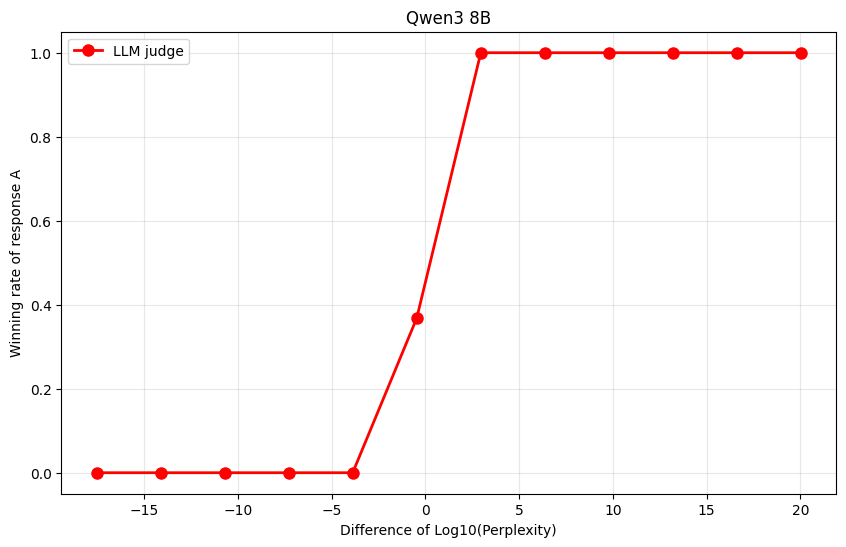

In [27]:
import numpy as np

import matplotlib.pyplot as plt

logprob_diffs = []
win_rates = []

# Calculate min and max values from the data
logprob_values = [obj.preference['Ok']['logprob_signed_difference'] for obj in objects]
min_val = min(logprob_values)
max_val = max(logprob_values)

# Create 12 bins dynamically based on data range
bins = np.linspace(min_val, max_val, 13)  # 13 edges for 12 bins
bin_centers = (bins[:-1] + bins[1:]) / 2

for i in range(len(bins) - 1):
    bin_start, bin_end = bins[i], bins[i + 1]
    items_in_bin = [obj for obj in objects 
                    if bin_start <= obj.preference['Ok']['logprob_signed_difference'] < bin_end]
    
    if items_in_bin:
        # Calculate win rate (preferred_answer == 1)
        wins = sum(1 for obj in items_in_bin if obj.preference['Ok']['preferred_answer'] == 1)
        win_rate = wins / len(items_in_bin)
        print(f'for perplexity diff within [{bin_start}, {bin_end}]\nwinrate = {wins} / {len(items_in_bin)} = {win_rate}\n')
        logprob_diffs.append(bin_centers[i])
        win_rates.append(win_rate)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(logprob_diffs, win_rates, marker='o', linewidth=2, markersize=8, color='red', label='LLM judge')
plt.xlabel('Difference of Log10(Perplexity)')
plt.ylabel('Winning rate of response A')
plt.title('Qwen3 8B')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()